In [1]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Thu_Feb_10_18:23:41_PST_2022
Cuda compilation tools, release 11.6, V11.6.112
Build cuda_11.6.r11.6/compiler.30978841_0
gcc (GCC) 11.2.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/home/abs/anaconda3/envs/open-mmlab3/bin/python


In [2]:
!pwd
%cd ..
!pwd

/home/abs/mmpose/demo
/home/abs/mmpose
/home/abs/mmpose


In [3]:
# Check Pytorch installation
import torch, torchvision
print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)


# Check MMPose installation
import mmpose
print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 1.8.2 True
torchvision version: 0.9.2
mmpose version: 0.23.0
cuda version: 11.1
compiler information: GCC 7.3


load checkpoint from local path: /home/abs/mmpose/work_dirs_rear/res152_animalpose_256x256/epoch_210.pth
load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
None


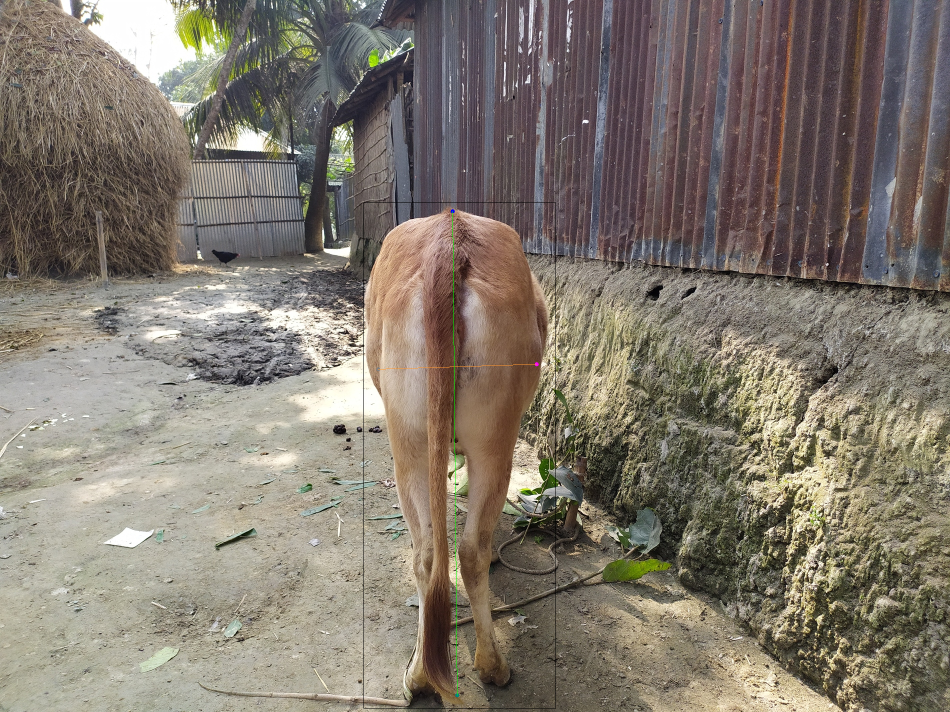

In [14]:
import cv2
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector
local_runtime = False

try:
  from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
  local_runtime = True

rear_pose_config = 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/animalpose/res152_animalpose_256x256.py'
rear_pose_checkpoint = '/home/abs/mmpose/work_dirs_rear/res152_animalpose_256x256/epoch_210.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
det_model = init_detector(det_config, det_checkpoint)

img = '/home/abs/mmpose/data/Rear/images/6.0_r_96_5.0_M.jpg'

# inference detection
mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=20)

# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(pose_model,
                                                               img,
                                                               person_results,
                                                               bbox_thr=0.3,
                                                               format='xyxy',
                                                               dataset=pose_model.cfg.data.test.type)

# show pose estimation results
vis_result = vis_pose_result(pose_model,
                             img,
                             pose_results,
                             thickness=1,
                             dataset=pose_model.cfg.data.test.type,
                             show=False)
# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

if local_runtime:
  from IPython.display import Image, display
  import tempfile
  import os.path as osp
  with tempfile.TemporaryDirectory() as tmpdir:
    file_name = osp.join(tmpdir, 'pose_results.png')
    cv2.imwrite(file_name, vis_result)
    display(Image(file_name))
else:
  cv2_imshow(vis_result)



In [9]:
%cd work_dirs/res152_animalpose_256x256/

/home/abs/mmpose/work_dirs/res152_animalpose_256x256


In [10]:
ls

20220303_155519.log       20220303_170840.log.json  20220303_183120.log
20220303_155749.log       20220303_171008.log       20220306_104116.log
20220303_160001.log       20220303_171008.log.json  20220306_104309.log
20220303_160356.log       20220303_171452.log       20220306_104902.log
20220303_160445.log       20220303_171452.log.json  20220306_105003.log
20220303_162730.log       20220303_171813.log       20220306_105037.log
20220303_163306.log       20220303_171813.log.json  20220306_105110.log
20220303_163352.log       20220303_181437.log       20220306_105129.log
20220303_163604.log       20220303_181701.log       20220306_105632.log
20220303_164552.log       20220303_181835.log       20220306_110051.log
20220303_164637.log       20220303_182000.log       20220306_110235.log
20220303_164719.log       20220303_182217.log       20220306_110235.log.json
20220303_165832.log       20220303_182226.log       best_AP_epoch_50.pth
20220303_170432.log       20220303_182822.log       epoch_